train_size 60000
batch_size 100
iter_per_epoch 600
iter:0 in calculation
train acc, test acc | 0.07475, 0.0731
iter:1 in calculation
iter:2 in calculation
iter:3 in calculation
iter:4 in calculation
iter:5 in calculation
iter:6 in calculation
iter:7 in calculation
iter:8 in calculation
iter:9 in calculation
iter:10 in calculation
iter:11 in calculation
iter:12 in calculation
iter:13 in calculation
iter:14 in calculation
iter:15 in calculation
iter:16 in calculation
iter:17 in calculation
iter:18 in calculation
iter:19 in calculation
iter:20 in calculation
iter:21 in calculation
iter:22 in calculation
iter:23 in calculation
iter:24 in calculation
iter:25 in calculation
iter:26 in calculation
iter:27 in calculation
iter:28 in calculation
iter:29 in calculation
iter:30 in calculation
iter:31 in calculation
iter:32 in calculation
iter:33 in calculation
iter:34 in calculation
iter:35 in calculation
iter:36 in calculation
iter:37 in calculation
iter:38 in calculation
iter:39 in calculation
i

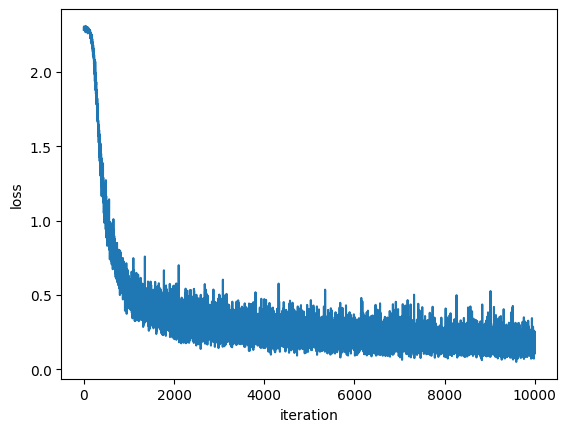

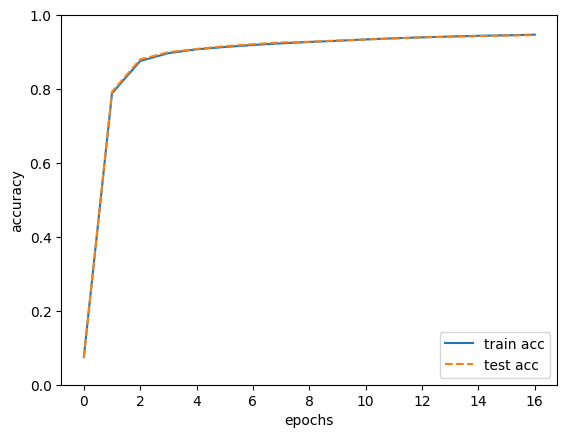

In [1]:

import numpy  as np
import matplotlib.pyplot as plt
from deaplearn  import sigmoid,softmax
from deaplearn  import cross_entropy_error

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值
        it.iternext()   
        
    return grad

# 两层神经网络的类
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:输入数据, t:监督数据
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t):
        """基于数值微分计算梯度"""
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        """ 高速计算梯度的方法-误差反向传播法 """
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


# mini-batch 实现
from dataset.mnist import load_mnist
(x_train,t_train),(x_test,t_test)= load_mnist(normalize=True,one_hot_label=True)

network=TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

#超参数
iter_num=10000
train_size=x_train.shape[0]
print("train_size %d"%train_size)
batch_size=100
print("batch_size %d"%batch_size)
lr = 0.1

train_loss_list=[]
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
print("iter_per_epoch %d"%iter_per_epoch)



for i in range(iter_num):
    msg="iter:%d in calculation"%i
    print(msg)
    # 获取 mini-batch
    batch_mask= np.random.choice(train_size,batch_size)
    x_batch= x_train[batch_mask]
    t_batch=t_train[batch_mask]

    #计算梯度
    # grad=network.numerical_gradient(x_batch,t_batch)
    grad= network.gradient(x_batch,t_batch) # 高速版

    #更新参数
    for key in ["W1","b1","W2","b2"]:
        network.params[key]-=lr*grad[key]

    # 记录学习过程
    loss=network.loss(x_batch,t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))



x=np.arange(len(train_loss_list))
plt.plot(x,train_loss_list)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

x=np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()


